In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import iplot

from warnings import filterwarnings
filterwarnings('ignore')

In [139]:
# Read in the Zomato dataset from a CSV file
df = pd.read_csv('/content/drive/MyDrive/dataset/zomato.csv')

In [140]:
# Display the first 5 rows of the DataFrame
df.head(5)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [141]:
df.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [142]:
columns_to_drop = ['menu_item','reviews_list','phone','address','url']
df.drop(columns = columns_to_drop, axis=True)

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...
51712,Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,Whitefield,Bar,NaN,Continental,"1,500",Pubs and bars,Whitefield
51713,Vinod Bar And Restaurant,No,No,NaN,0,Whitefield,Bar,NaN,Finger Food,600,Pubs and bars,Whitefield
51714,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,Whitefield,Bar,NaN,Finger Food,"2,000",Pubs and bars,Whitefield
51715,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,"2,500",Pubs and bars,Whitefield


In [143]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [144]:
# Replace missing and new values in the 'rate' column with 0
df['rate'] = df['rate'].replace(['NAN','NEW'], '0')

# Split the 'rate' column by '/' or ' /' and keep the first part
df['rate'] = df['rate'].str.split('/').str[0].str.strip()
df['rate'] = df['rate'].str.split(' /').str[0].str.strip()

# Convert the 'rate' column to numeric type
df['rate'] = pd.to_numeric(df['rate'], errors='coerce')
df['rate'] = df['rate'].astype(float)

# Fill missing values in the 'rate' column with 0
df['rate'] = df['rate'].fillna(0)
# Get the unique values in the 'rate' column
df['rate'].unique()

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, 0. , 2.9, 3.5, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4, 2.2,
       2.3, 4.8, 4.9, 2.1, 2. , 1.8])

In [145]:
df.dropna(axis='index',subset=['rate'],inplace=True)

In [146]:
df['name'].unique()

array(['Jalsa', 'Spice Elephant', 'San Churro Cafe', ..., 'Nawabs Empire',
       'SeeYa Restaurant',
       'Plunge - Sheraton Grand Bengaluru Whitefield Hotel &...'],
      dtype=object)

In [147]:
#split the name of the restaurant to make it more clear
df['name'] = df['name'].str.split(' - ').str[0].str.strip()

# Convert the 'name' column to lowercase
df['name'] = df['name'].str.lower()


df['name'].unique()

array(['jalsa', 'spice elephant', 'san churro cafe', ..., 'nawabs empire',
       'seeya restaurant', 'plunge'], dtype=object)

In [148]:
# Split the 'location' column by ',' and keep the first part
df['location'] = df['location'].str.split(',').str[0].str.strip()

In [149]:
# Rename the 'listed_in(city)' column to 'rest_city'
df = df.rename(columns={'listed_in(city)':'rest_city'})

In [150]:
df_rate=df.groupby('name')['rate'].mean().to_frame() #converts into dataframe
df_rate=df_rate.reset_index()
df_rate.columns=['restaurant','rating'] #renaming the columns
df_rate.head(20)

,restaurant,rating
0,#feeltheroll,3.400000
1,#l-81 cafe,3.900000
2,#refuel,3.700000
3,#vibes restro,0.000000
4,'brahmins' thatte idli,0.000000
5,1 fahreheit,0.000000
6,1000 b.c,3.200000
7,100ãâãâãâãâãâãâãâãâ°c,3.700000
8,11 to 11 express biriyanis,3.500000
9,1131 bar + kitchen,4.500000


<Axes: xlabel='rating', ylabel='Density'>

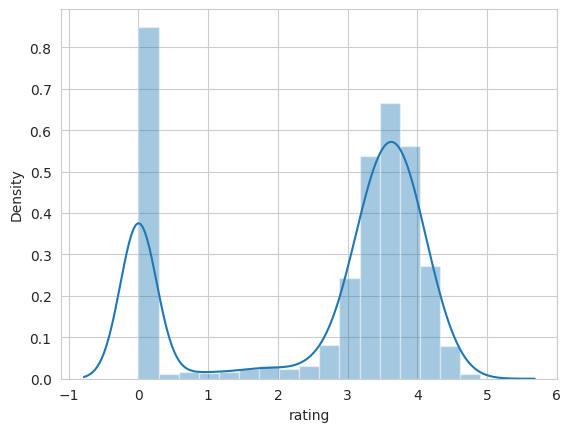

In [151]:
sns.set_style(style='whitegrid')
sns.distplot(df_rate['rating'])

Conclusion - Almost more than 50 percent of restaurants has rating between 3 and 4. Restaurants having rating more than 4.5 are very rare.



# **Top restaurant chains in Bangalore**

Text(0.5, 0, 'Number of outlets')

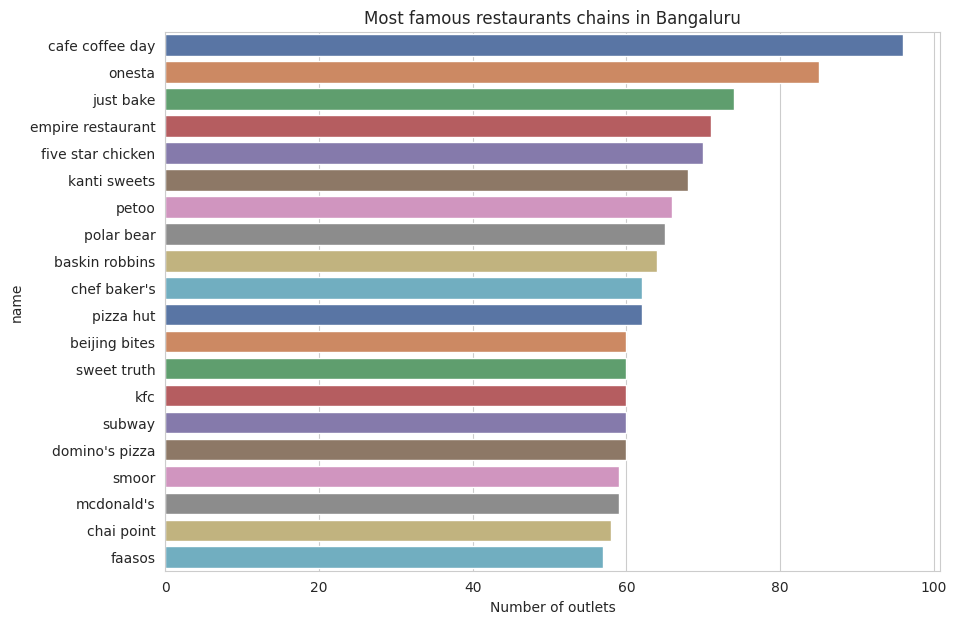

In [152]:
plt.figure(figsize=(10,7))
chains=df['name'].value_counts()[0:20]
sns.barplot(x=chains,y=chains.index,palette='deep')
plt.title("Most famous restaurants chains in Bangaluru")
plt.xlabel("Number of outlets")

In [153]:
df['rest_type'].isna().sum() #checking the null values

227

## Top Restraunt Types

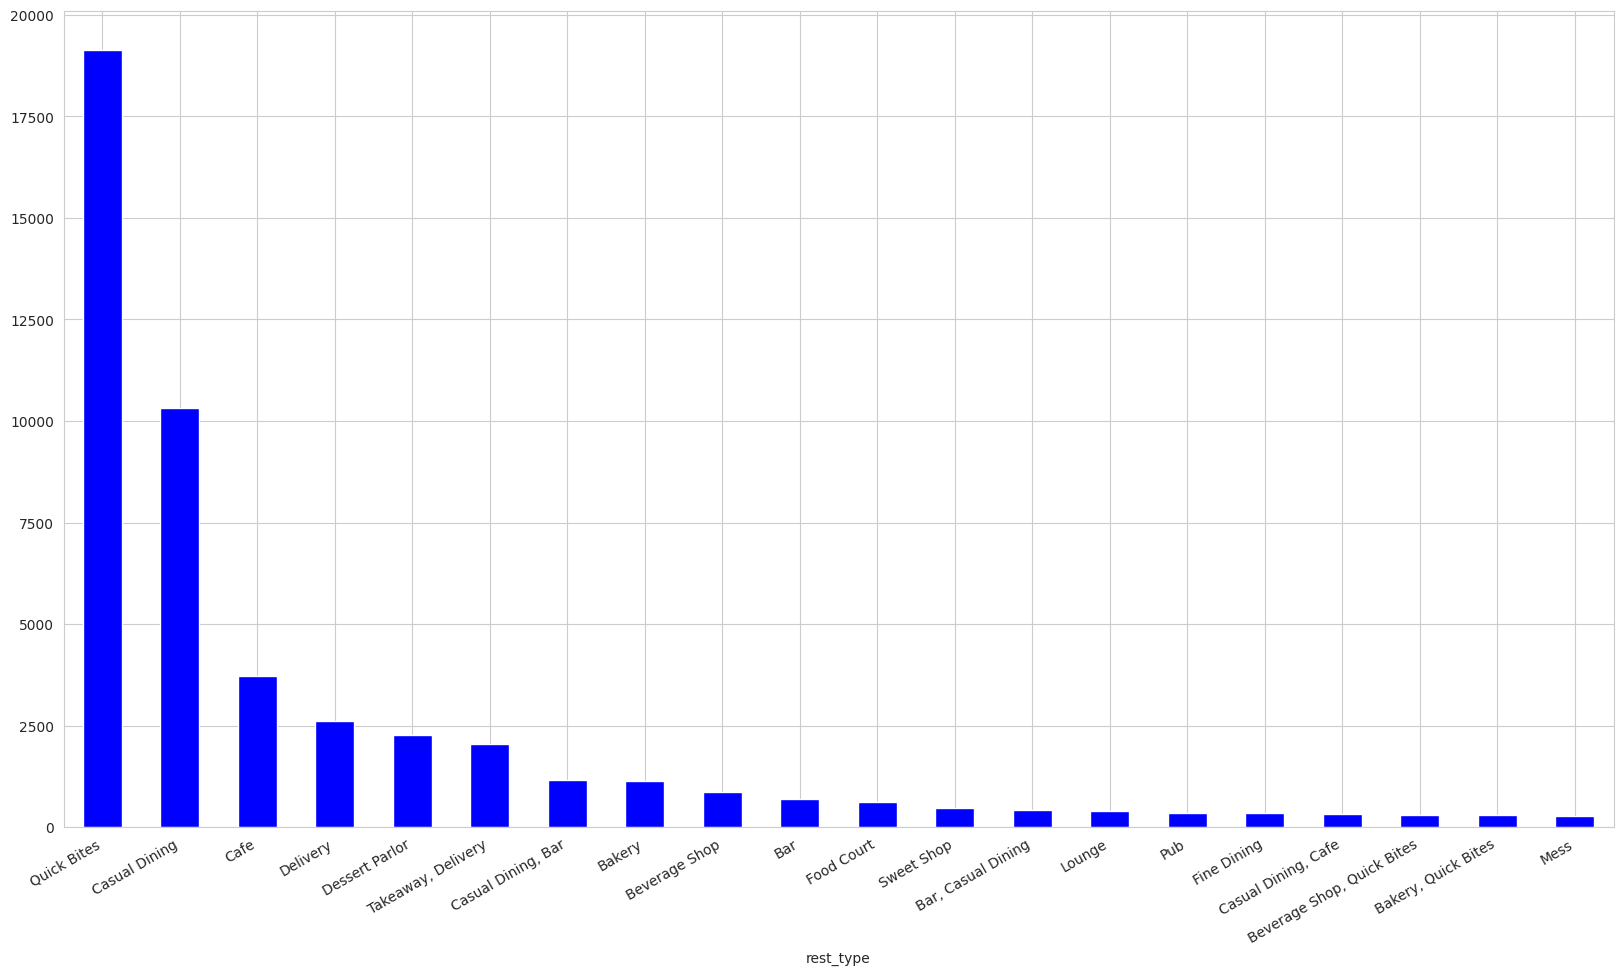

In [154]:
plt.figure(figsize=(20,12))
df['rest_type'].value_counts().nlargest(20).plot.bar(color='blue')
plt.gcf().autofmt_xdate()

In [155]:
trace1 = go.Bar(
        x = df['rest_type'].value_counts().nlargest(20).index,
        y = df['rest_type'].value_counts().nlargest(20),
        name= 'rest_type')

In [156]:
iplot([trace1])

#####Since Banglore is known as the tech capital of India,people having busy and modern life will prefer Quick Bites.
##### Thus we can observe that Quick Bites type restaurants dominates.

Text(0, 0.5, 'Online Order Percentage')

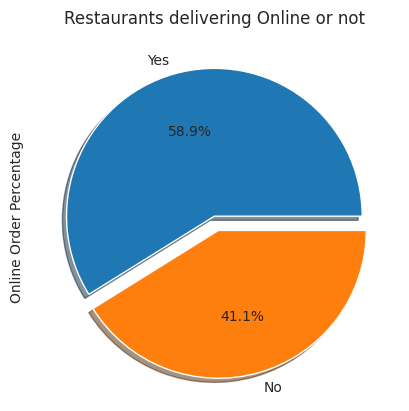

In [157]:

df['online_order'].value_counts().plot(kind='pie', autopct="%0.1f%%", explode=[0, 0.1], shadow=True)
plt.title('Restaurants delivering Online or not')
plt.ylabel('Online Order Percentage')

Text(0, 0.5, 'book percentage')

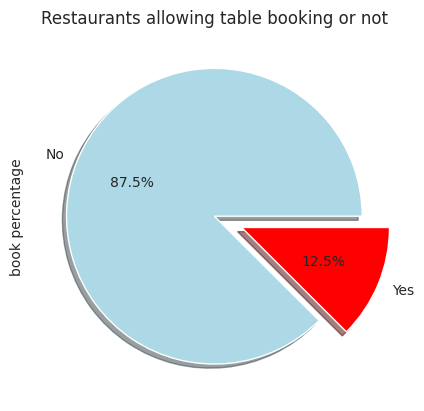

In [158]:
colors = [ 'lightblue' , 'red']
df['book_table'].value_counts().plot(kind='pie', autopct="%0.1f%%", explode=[0, 0.2], shadow=True, colors =colors)

plt.title('Restaurants allowing table booking or not')
plt.ylabel('book percentage')

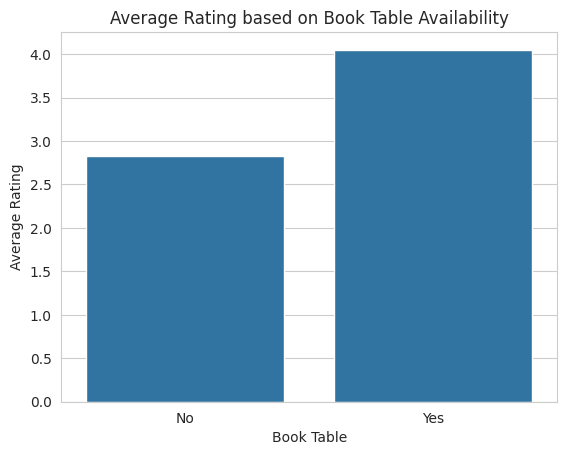

In [159]:
avg_ratings = df.groupby('book_table')['rate'].mean().reset_index()

sns.barplot(x='book_table', y='rate', data=avg_ratings)#barplot

plt.xlabel('Book Table')
plt.ylabel('Average Rating')
plt.title('Average Rating based on Book Table Availability')
plt.show()

# Total restaurants at different locations of Bangalore

In [160]:
df.groupby('location')['name'].unique()

location
BTM                  [sankranthi veg restaurant, hearts unlock cafe...
Banashankari         [jalsa, spice elephant, san churro cafe, addhu...
Banaswadi            [cafe nibras, the sanctuary, crunch pizzas, 9 ...
Bannerghatta Road    [deja vu resto bar, fattoush, empire restauran...
Basavanagudi         [grand village, timepass dinner, srinathji's c...
                                           ...                        
West Bangalore       [freshmenu, fit dish fetish, garden city mobil...
Whitefield           [imperio cafe, night diaries, localhost, ab's,...
Wilson Garden        [tree top, sahana's (nati style), karavali kol...
Yelahanka            [prashanth naati corner, red chillies curries ...
Yeshwantpur          [chef's bank, new agarwal bhavan, fishing boat...
Name: name, Length: 93, dtype: object

In [161]:
restaurant=[]
location=[]
for key,location_df in df.groupby('location'):
    location.append(key)
    restaurant.append(len(location_df['name'].unique()))

In [162]:
df_total=pd.DataFrame(zip(location,restaurant)) #creating data frame
df_total.columns=['location','restaurant']
df_total.set_index('location',inplace=True)
df_total.sort_values(by='restaurant').tail(10)

,restaurant
location,
Bellandur,349
Jayanagar,352
Bannerghatta Road,448
JP Nagar,500
Indiranagar,525
Marathahalli,656
HSR,682
Electronic City,693
BTM,699


This shows Whitefield and BTM has the maximum number of restaurant

In [163]:
trace1 = go.Bar(
        x = df_total['restaurant'].nlargest(10).index,
        y = df_total['restaurant'].nlargest(10),
        name= 'Priority')

In [164]:
iplot([trace1])

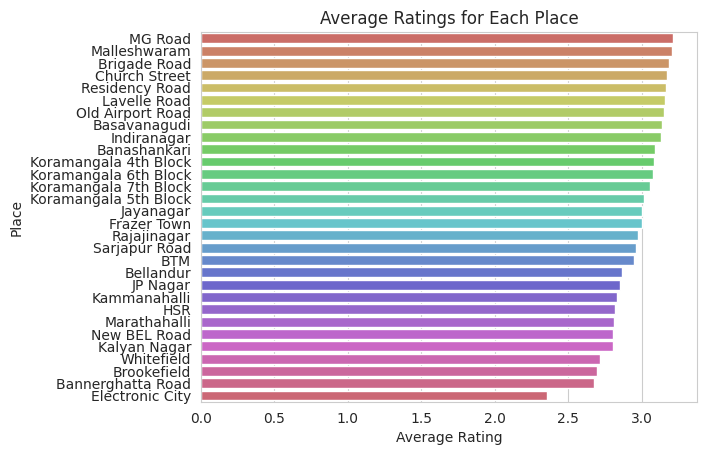

In [165]:
# Calculate average ratings for each Place
avg_ratings = df.groupby('rest_city')['rate'].mean().reset_index()

# Sort by average ratings in descending order
avg_ratings_sorted = avg_ratings.sort_values(by='rate', ascending=False)

# Create a bar plot with different colors for each restaurant
colors = sns.color_palette('hls', len(avg_ratings_sorted))
sns.barplot(y='rest_city', x='rate', data=avg_ratings_sorted, palette=colors,legend=False)

plt.xlabel('Average Rating')
plt.ylabel('Place')
plt.title('Average Ratings for Each Place')
plt.show()

Text(0, 0.5, 'Percentage of total')

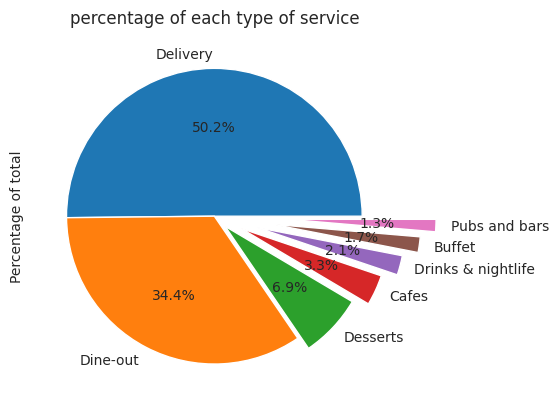

In [166]:
#make a percentage of each type of service
df['listed_in(type)'].value_counts().plot(kind ='pie', autopct = '%0.1F%%', explode =[0,0,0.1,0.2,0.3,0.4,0.5] )

plt.title('percentage of each type of service')
plt.ylabel('Percentage of total')

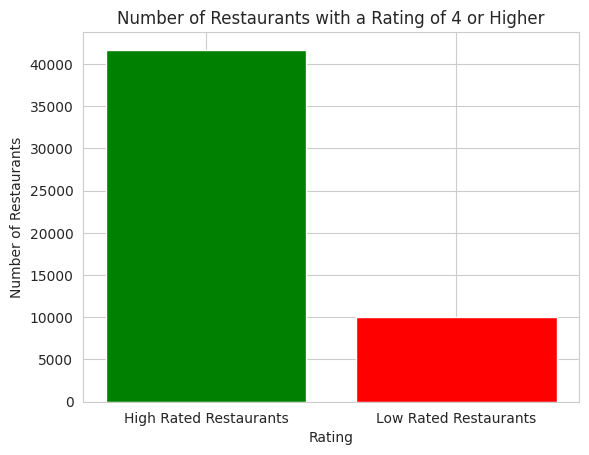

In [167]:
# Count the number of restaurants with a rating of 4 or higher
high_rated_restaurants = df[df['votes'] >= 4]['votes'].count()

# Count the number of restaurants with a rating of less than 4
low_rated_restaurants = df[df['votes'] < 4]['votes'].count()

# Create a bar chart to visualize the results
plt.bar(['High Rated Restaurants', 'Low Rated Restaurants'], [high_rated_restaurants, low_rated_restaurants], color=['green', 'red'])

# Add title and axis labels
plt.title('Number of Restaurants with a Rating of 4 or Higher')
plt.xlabel('Rating')
plt.ylabel('Number of Restaurants')

# Display the chart
plt.show()


# Analyse Approx cost for two people


In [168]:
len(df['approx_cost(for two people)'].value_counts())

70

In [169]:
df['approx_cost(for two people)'].isna().sum()

346

In [170]:
df.dropna(axis='index',subset=['approx_cost(for two people)'],inplace=True)  #to delete the missing values

In [171]:
df['approx_cost(for two people)'].isna().sum()

0

In [172]:
df['approx_cost(for two people)'].dtype #checking the data type

dtype('O')

In [173]:
df['approx_cost(for two people)'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

In [175]:
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].apply(lambda x: x.replace(',','')) #to remove comma

In [176]:
df['approx_cost(for two people)']=df['approx_cost(for two people)'].astype(int) #data tyoe is changed from object to int

<Axes: xlabel='approx_cost(for two people)', ylabel='Density'>

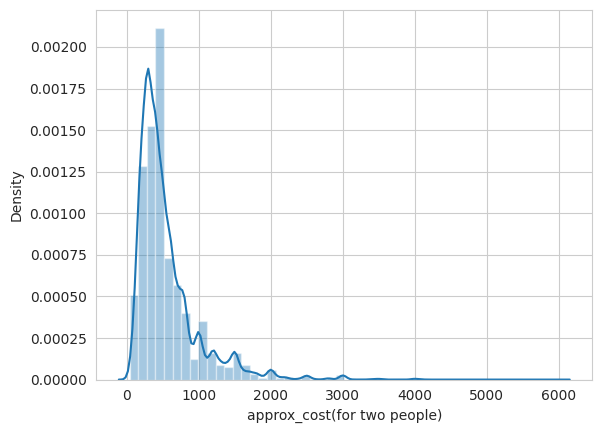

In [177]:
sns.distplot(df['approx_cost(for two people)'])

about 50% of the restaurants are affordable in Bangalore

# Cheapest Restaurants in Bangalore

In [178]:
df['approx_cost(for two people)'].min()

40

# Expensive Restaurants in Bangalore

In [179]:
df['approx_cost(for two people)'].max()

6000

In [180]:
df[df['approx_cost(for two people)']==6000]['name']

19139    le cirque signature
45618    le cirque signature
Name: name, dtype: object

In [182]:
data=df.copy()

In [183]:
data.set_index('name',inplace=True)

# Top 10 Most Expensive restaurant with approx cost for 2 people

<Axes: xlabel='name'>

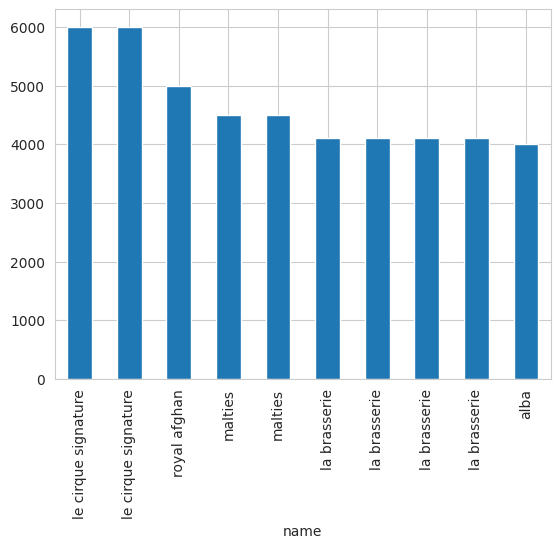

In [184]:
data['approx_cost(for two people)'].nlargest(10).plot.bar()

# Top 10 Cheapest restaurant with approx cost for 2 people

<Axes: xlabel='name'>

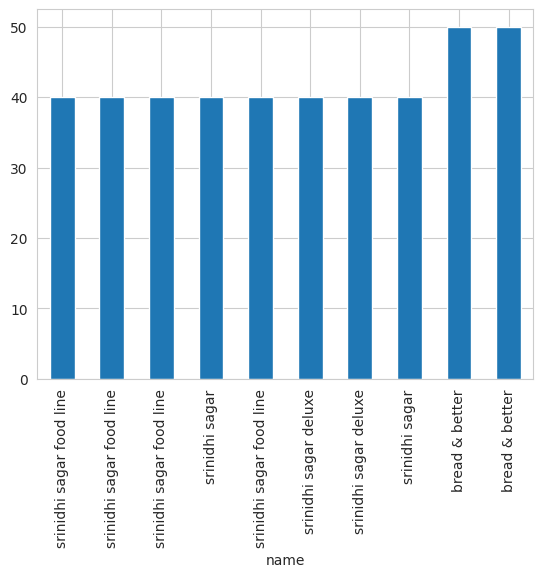

In [185]:
data['approx_cost(for two people)'].nsmallest(10).plot.bar()

# Finding Best budget Restaurants in any location

###### we will pass location and restaurant type as parameteres,function will return name of restaurants.

In [186]:
def return_budget(location,restaurant):
    budget=df[(df['approx_cost(for two people)']<=400) & (df['location']==location) &
                     (df['rate']>4) & (df['rest_type']==restaurant)]
    return(budget['name'].unique())

In [197]:
return_budget('BTM',"Quick Bites")

array(['swadista aahar', 'litti twist', 'the shawarma shop', 'gorbandh',
       'yum in my tum', 'chaatimes', "muthashy's", 'swad punjab da',
       "domino's pizza", 'roti wala', 'andhra kitchen'], dtype=object)

In [196]:
Restaurant_locations=df['location'].value_counts()[:20]
trace1 = go.Bar(
        x = Restaurant_locations.index,
        y = Restaurant_locations,
        name= 'Priority')
iplot([trace1])

#### We can see that BTM,HSR and Koranmangala 5th block has the most number of restaurants.
#### BTM dominates the section by having more than 5000 restaurants.

#**Geographical analysis**

###### Need Latitudes & longitudes for each of the place for geaographical Data analysis,so to fetch lat,lon of each place,use Geopy

In [198]:
df.shape

(51371, 17)

In [199]:
len(df['location'].unique())

93

In [200]:
locations=pd.DataFrame({"Name":df['location'].unique()})

In [202]:
locations['new_Name']='Bangalore '+locations['Name']

In [203]:
locations.head()

,Name,new_Name
0,Banashankari,Bangalore Banashankari
1,Basavanagudi,Bangalore Basavanagudi
2,Mysore Road,Bangalore Mysore Road
3,Jayanagar,Bangalore Jayanagar
4,Kumaraswamy Layout,Bangalore Kumaraswamy Layout


In [204]:
!pip install geopy

In [205]:
from geopy.geocoders import Nominatim

In [207]:
lat_lon=[] # list that will store the lat and lon
geolocator=Nominatim(user_agent="app") # to establish connection
for location in locations['Name']:
    location = geolocator.geocode(location)
    if location is None:
        lat_lon.append(np.nan) # if no location is there
    else:
        geo=(location.latitude,location.longitude)
        lat_lon.append(geo)

In [209]:
locations['geo_loc']=lat_lon

In [210]:
locations.head()

,Name,new_Name,geo_loc
0,Banashankari,Bangalore Banashankari,"(15.8876779, 75.7046777)"
1,Basavanagudi,Bangalore Basavanagudi,"(13.8345913, 75.7339359)"
2,Mysore Road,Bangalore Mysore Road,"(12.9467026, 77.5300705)"
3,Jayanagar,Bangalore Jayanagar,"(27.3493013, 95.3159407)"
4,Kumaraswamy Layout,Bangalore Kumaraswamy Layout,"(12.9067683, 77.5595021)"


In [211]:
locations.to_csv('zomato_locations.csv',index=False)

##### We have found out latitude and longitude of each location listed in the dataset using geopy.
##### This is used to plot maps.

In [212]:
Rest_locations=pd.DataFrame(df['location'].value_counts().reset_index())

In [213]:
Rest_locations.columns=['Name','count']
Rest_locations.head()

,Name,count
0,BTM,5098
1,HSR,2508
2,Koramangala 5th Block,2481
3,JP Nagar,2230
4,Whitefield,2133


In [214]:
locations.head()

,Name,new_Name,geo_loc
0,Banashankari,Bangalore Banashankari,"(15.8876779, 75.7046777)"
1,Basavanagudi,Bangalore Basavanagudi,"(13.8345913, 75.7339359)"
2,Mysore Road,Bangalore Mysore Road,"(12.9467026, 77.5300705)"
3,Jayanagar,Bangalore Jayanagar,"(27.3493013, 95.3159407)"
4,Kumaraswamy Layout,Bangalore Kumaraswamy Layout,"(12.9067683, 77.5595021)"


In [215]:
Restaurant_locations=Rest_locations.merge(locations,on='Name',how="left").dropna()
Restaurant_locations.head()

,Name,count,new_Name,geo_loc
0,BTM,5098,Bangalore BTM,"(45.95485055, -112.49659530324134)"
1,HSR,2508,Bangalore HSR,"(29.1523467, 75.7245798)"
2,Koramangala 5th Block,2481,Bangalore Koramangala 5th Block,"(12.9348429, 77.6189768)"
3,JP Nagar,2230,Bangalore JP Nagar,"(12.9096941, 77.5866067)"
4,Whitefield,2133,Bangalore Whitefield,"(53.5533682, -2.2969019)"


In [216]:
Restaurant_locations['count'].max()

5098

In [218]:
def generateBaseMap(default_location=[12.97, 77.59], default_zoom_start=12):
    base_map = folium.Map(location=default_location, zoom_start=default_zoom_start)
    return base_map

In [219]:
np.array(Restaurant_locations['geo_loc'])

array([(45.95485055, -112.49659530324134), (29.1523467, 75.7245798),
       (12.9348429, 77.6189768), (12.9096941, 77.5866067),
       (53.5533682, -2.2969019), (12.9732913, 77.6404672),
       (27.3493013, 95.3159407), (12.9552572, 77.6984163),
       (12.9366292, 77.6014714), (12.93103185, 77.6782471),
       (12.848759900000001, 77.64825295827616), (12.9277245, 77.6327822),
       (50.7962518, -120.3174744), (12.9364846, 77.6134783),
       (12.9390255, 77.6238477), (12.9244812, 77.6503058),
       (12.9327778, 77.6294052), (12.9778793, 77.6246697),
       (15.8876779, 75.7046777), (12.9755264, 77.6067902),
       (19.1602288, 76.2772822), (40.5759389, -74.1254948),
       (13.0027353, 77.5703253), (12.9986827, 77.615525),
       (13.8345913, 75.7339359), (38.7385916, -77.5275749),
       (33.5935063, -79.0345627), (13.0141618, 77.6518539),
       (13.0356738, 77.5672699), (13.0093455, 77.6377094),
       (12.9882338, 77.554883), (40.7126888, -74.0097405),
       (38.5034877, -122.7

In [220]:
#### unzip it
lat,lon=zip(*np.array(Restaurant_locations['geo_loc']))

In [222]:
Restaurant_locations['lat']=lat
Restaurant_locations['lon']=lon

In [223]:
Restaurant_locations.head()

,Name,count,new_Name,geo_loc,lat,lon
0,BTM,5098,Bangalore BTM,"(45.95485055, -112.49659530324134)",45.954851,-112.496595
1,HSR,2508,Bangalore HSR,"(29.1523467, 75.7245798)",29.152347,75.724580
2,Koramangala 5th Block,2481,Bangalore Koramangala 5th Block,"(12.9348429, 77.6189768)",12.934843,77.618977
3,JP Nagar,2230,Bangalore JP Nagar,"(12.9096941, 77.5866067)",12.909694,77.586607
4,Whitefield,2133,Bangalore Whitefield,"(53.5533682, -2.2969019)",53.553368,-2.296902


In [224]:
!pip install folium

In [225]:
import folium
from folium.plugins import HeatMap
basemap=generateBaseMap()

In [226]:
basemap

In [227]:
Restaurant_locations[['lat','lon','count']].values.tolist()

[[45.95485055, -112.49659530324134, 5098.0],
 [29.1523467, 75.7245798, 2508.0],
 [12.9348429, 77.6189768, 2481.0],
 [12.9096941, 77.5866067, 2230.0],
 [53.5533682, -2.2969019, 2133.0],
 [12.9732913, 77.6404672, 2038.0],
 [27.3493013, 95.3159407, 1918.0],
 [12.9552572, 77.6984163, 1829.0],
 [12.9366292, 77.6014714, 1617.0],
 [12.93103185, 77.6782471, 1286.0],
 [12.848759900000001, 77.64825295827616, 1257.0],
 [12.9277245, 77.6327822, 1237.0],
 [50.7962518, -120.3174744, 1218.0],
 [12.9364846, 77.6134783, 1176.0],
 [12.9390255, 77.6238477, 1144.0],
 [12.9244812, 77.6503058, 1055.0],
 [12.9327778, 77.6294052, 1017.0],
 [12.9778793, 77.6246697, 1017.0],
 [15.8876779, 75.7046777, 906.0],
 [12.9755264, 77.6067902, 894.0],
 [19.1602288, 76.2772822, 850.0],
 [40.5759389, -74.1254948, 804.0],
 [13.0027353, 77.5703253, 724.0],
 [12.9986827, 77.615525, 720.0],
 [13.8345913, 75.7339359, 684.0],
 [38.7385916, -77.5275749, 674.0],
 [33.5935063, -79.0345627, 656.0],
 [13.0141618, 77.6518539, 653.0],


In [228]:
HeatMap(Restaurant_locations[['lat','lon','count']].values.tolist(),zoom=20,radius=15).add_to(basemap)

In [229]:
basemap

#South Indian Restraunts


In [251]:
df3= df[df['cuisines']=='South Indian']
south_india=df2.groupby(['location'],as_index=False)['url'].agg('count')
south_india.columns=['Name','count']
south_india=south_india.merge(locations,on="Name",how='left').dropna()
south_india['lan'],south_india['lon']=zip(*south_india['geo_loc'].values)

In [252]:
south_india=south_india.drop(['geo_loc'],axis=1)

In [253]:
south_india.head()

,Name,count,new_Name,lan,lon
0,BTM,86,Bangalore BTM,45.954851,-112.496595
1,Banashankari,10,Bangalore Banashankari,15.887678,75.704678
2,Banaswadi,4,Bangalore Banaswadi,13.014162,77.651854
3,Bannerghatta Road,36,Bangalore Bannerghatta Road,12.936629,77.601471
4,Basavanagudi,12,Bangalore Basavanagudi,13.834591,75.733936


In [254]:
basemap=generateBaseMap()
HeatMap(south_india[['lan','lon','count']].values.tolist(),zoom=20,radius=15).add_to(basemap)
basemap

#North Indian Restraunts

In [245]:
df2= df[df['cuisines']=='North Indian']
df2.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),rest_city
5,https://www.zomato.com/bangalore/timepass-dinn...,"37, 5-1, 4th Floor, Bosco Court, Gandhi Bazaar...",timepass dinner,Yes,No,3.8,286,+91 9980040002\r\n+91 9980063005,Basavanagudi,Casual Dining,"Onion Rings, Pasta, Kadhai Paneer, Salads, Sal...",North Indian,600,"[('Rated 3.0', 'RATED\n Food 3/5\nAmbience 3/...",[],Buffet,Banashankari
94,https://www.zomato.com/bangalore/nandhini-delu...,"304, Opposite Apollo Public School, 100 Feet R...",nandhini deluxe,No,No,2.6,283,080 26890011\r\n080 26890033,Banashankari,Casual Dining,"Biryani, Chicken Guntur, Thali, Buttermilk, Ma...",North Indian,600,"[('Rated 3.0', 'RATED\n Ididnt like much.\n\n...",[],Delivery,Banashankari
191,https://www.zomato.com/bangalore/mini-punjabi-...,"7/1, Behind BMS College Hostel, Hanumantha Nag...",mini punjabi dhaba,Yes,No,4.2,287,+91 9845044074\r\n+91 7406012344,Banashankari,Quick Bites,"Panneer Butter Masala, Lassi, Paratha, Jeera R...",North Indian,350,"[('Rated 4.0', 'RATED\n This place was introd...",[],Delivery,Banashankari
206,https://www.zomato.com/bangalore/dal-tadkaa-ba...,"1, Kathriguppe Main Road, 3rd Stage, Banashank...",dal tadkaa,Yes,No,2.5,247,080 26691763\r\n+91 9620138000,Banashankari,Casual Dining,"Paratha, Boondi Raita, Roti, Kulfi, Panneer Bu...",North Indian,500,"[('Rated 5.0', ""RATED\n I have never written ...",[],Delivery,Banashankari
257,https://www.zomato.com/bangalore/timepass-dinn...,"37, 5-1, 4th Floor, Bosco Court, Gandhi Bazaar...",timepass dinner,Yes,No,3.8,286,+91 9980040002\r\n+91 9980063005,Basavanagudi,Casual Dining,"Onion Rings, Pasta, Kadhai Paneer, Salads, Sal...",North Indian,600,"[('Rated 3.0', 'RATED\n Food 3/5\nAmbience 3/...",[],Delivery,Banashankari


In [246]:
north_india=df2.groupby(['location'],as_index=False)['url'].agg('count')
north_india.columns=['Name','count']
north_india.head()

,Name,count
0,BTM,86
1,Banashankari,10
2,Banaswadi,4
3,Bannerghatta Road,36
4,Basavanagudi,12


In [247]:
north_india=north_india.merge(locations,on="Name",how='left').dropna()

In [248]:
north_india['lan'],north_india['lon']=zip(*north_india['geo_loc'].values)


In [249]:
north_india.drop(['geo_loc'],axis=1)

,Name,count,new_Name,lan,lon
0,BTM,86,Bangalore BTM,45.954851,-112.496595
1,Banashankari,10,Bangalore Banashankari,15.887678,75.704678
2,Banaswadi,4,Bangalore Banaswadi,13.014162,77.651854
3,Bannerghatta Road,36,Bangalore Bannerghatta Road,12.936629,77.601471
4,Basavanagudi,12,Bangalore Basavanagudi,13.834591,75.733936
5,Basaveshwara Nagar,1,Bangalore Basaveshwara Nagar,12.991180,77.544892
6,Bellandur,61,Bangalore Bellandur,12.931032,77.678247
7,Brigade Road,12,Bangalore Brigade Road,50.796252,-120.317474
8,Brookefield,23,Bangalore Brookefield,33.593506,-79.034563
9,CV Raman Nagar,3,Bangalore CV Raman Nagar,17.251068,80.165198


In [250]:
basemap=generateBaseMap()
HeatMap(north_india[['lan','lon','count']].values.tolist(),zoom=20,radius=15).add_to(basemap)
basemap